ML - REINFORCEMENT

Bank Customer Churn Prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df = pd.read_csv('/content/Bank Customer Churn.csv')

Data Understanding

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 12)

In [ ]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

Column Descriptions
* customer_id: Unique identifier for each customer.​
* credit_score: Credit score of the customer.​
* country: Country where the customer resides
* gender: Gender of the customer (Male/Female).​  
* age: Age of the customer in years.​  
* tenure: Number of years the customer has been with the bank.  
* balance: Account balance of the customer.​
* products_number: Number of bank products the customer uses.​
* credit_card: Whether the customer has a credit card (1 = Yes, 0 = No).​
* active_member: Whether the customer is an active member (1 = Yes, 0 = No).
* estimated_salary: Estimated annual salary of the customer.​
* churn: Whether the customer churned (1 = Yes, 0 = No)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
df.dtypes

,0
customer_id,int64
credit_score,int64
country,object
gender,object
age,int64
tenure,int64
balance,float64
products_number,int64
credit_card,int64
active_member,int64


In [ ]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Data Cleaning


In [ ]:
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [ ]:
df.drop('customer_id', axis=1, inplace=True)

In [ ]:
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})

In [ ]:
country_mapping = {'France': 0, 'Germany': 1, 'Spain': 2}
df['country'] = df['country'].map(country_mapping)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,772,1,0,42,3,75075.31,2,1,0,92888.52,1


Outliers

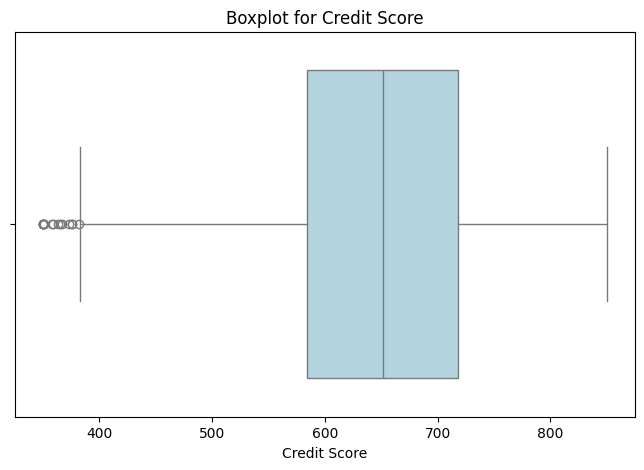

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['credit_score'], color='lightblue')
plt.title('Boxplot for Credit Score')
plt.xlabel('Credit Score')
plt.show()

In [ ]:
Q1 = df['credit_score'].quantile(0.25)
Q3 = df['credit_score'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.0 * IQR
upper_limit = Q3 + 1.0 * IQR

df = df[(df['credit_score'] >= lower_limit) & (df['credit_score'] <= upper_limit)]

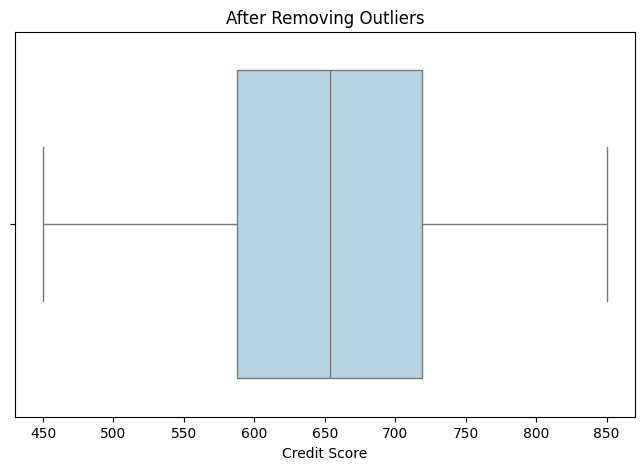

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['credit_score'], color='lightblue')
plt.title('After Removing Outliers')
plt.xlabel('Credit Score')
plt.show()

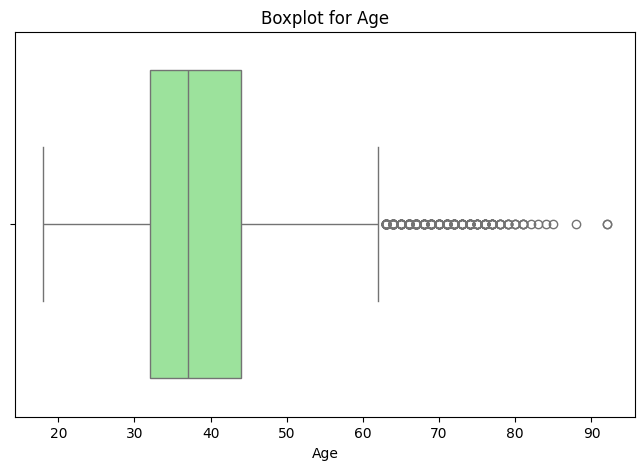

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['age'], color='lightgreen')
plt.title('Boxplot for Age')
plt.xlabel('Age')
plt.show()

In [ ]:
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_limit_age = Q1_age - 1.0 * IQR_age
upper_limit_age = Q3_age + 1.0 * IQR_age

df = df[(df['age'] >= lower_limit_age) & (df['age'] <= upper_limit_age)]

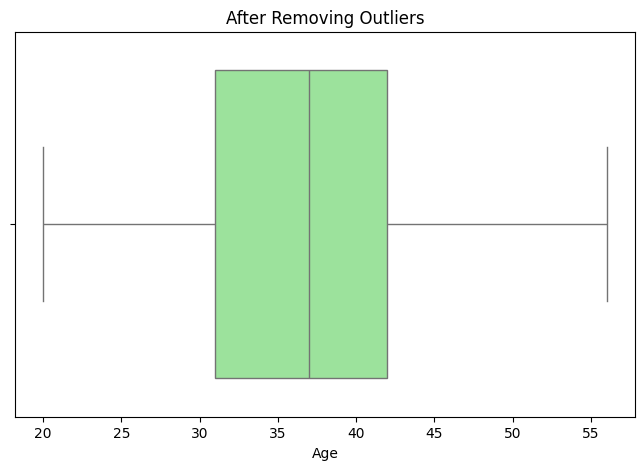

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['age'], color='lightgreen')
plt.title('After Removing Outliers')
plt.xlabel('Age')
plt.show()

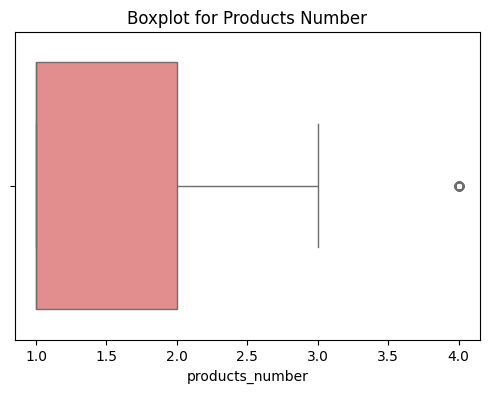

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['products_number'], color='lightcoral')
plt.title('Boxplot for Products Number')
plt.show()

In [ ]:
Q1 = df['products_number'].quantile(0.25)
Q3 = df['products_number'].quantile(0.75)
IQR= Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df = df[(df['products_number'] >= lower_limit) & (df['products_number'] <= upper_limit)]

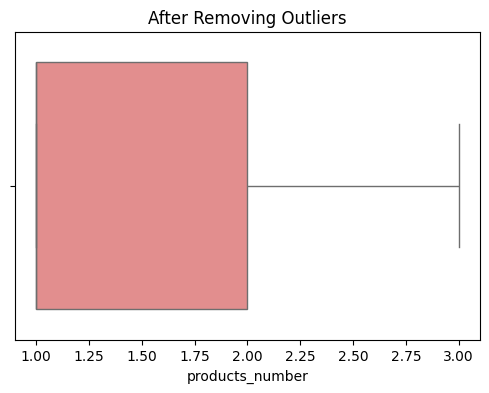

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['products_number'], color='lightcoral')
plt.title('After Removing Outliers')
plt.show()

Exploratory Data Analysis

Univariate Analysis

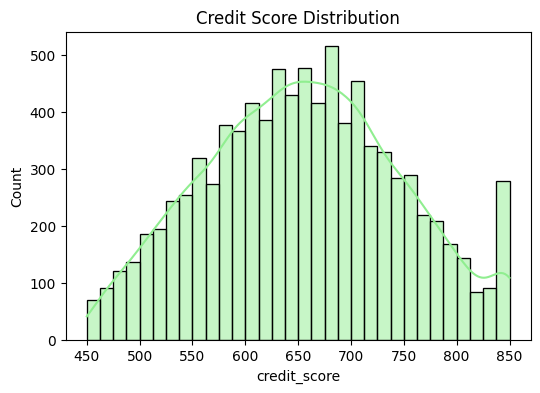

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['credit_score'], kde=True, color='lightgreen')
plt.title('Credit Score Distribution')
plt.show()

Insights
* The Highest credit scores are around 650 – 700.
* The Lowest credit Scores are around 450 - 500.

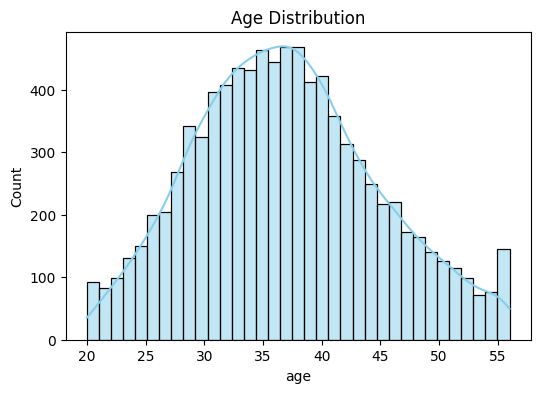

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'], kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()

Insights
* Most customers are aged between 30 and 40 years.
* Very few customers are younger than 25 or older than 50.

Bivariate Analysis

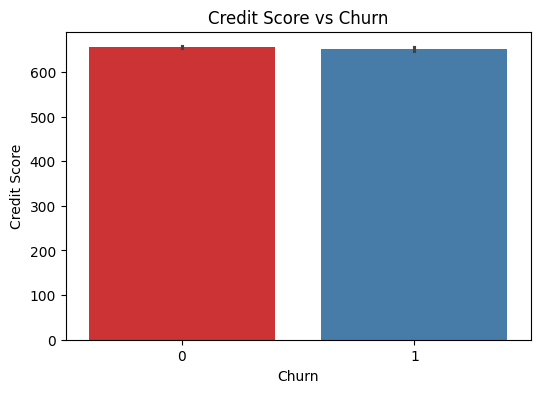

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='churn', y='credit_score', data=df, palette='Set1')
plt.title('Credit Score vs Churn')
plt.xlabel('Churn')
plt.ylabel('Credit Score')
plt.show()

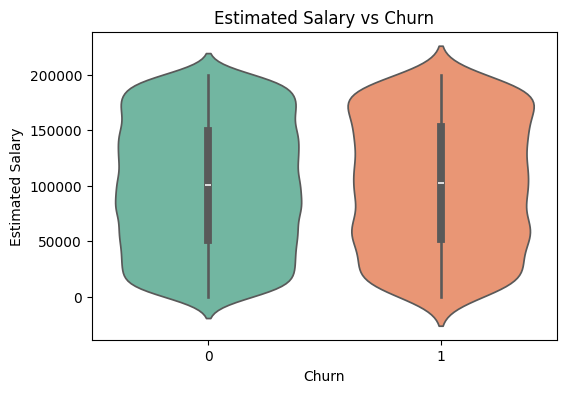

In [ ]:
plt.figure(figsize=(6,4))
sns.violinplot(x='churn', y='estimated_salary', data=df, palette='Set2')
plt.title('Estimated Salary vs Churn')
plt.xlabel('Churn')
plt.ylabel('Estimated Salary')
plt.show()

Multivariate Analysis

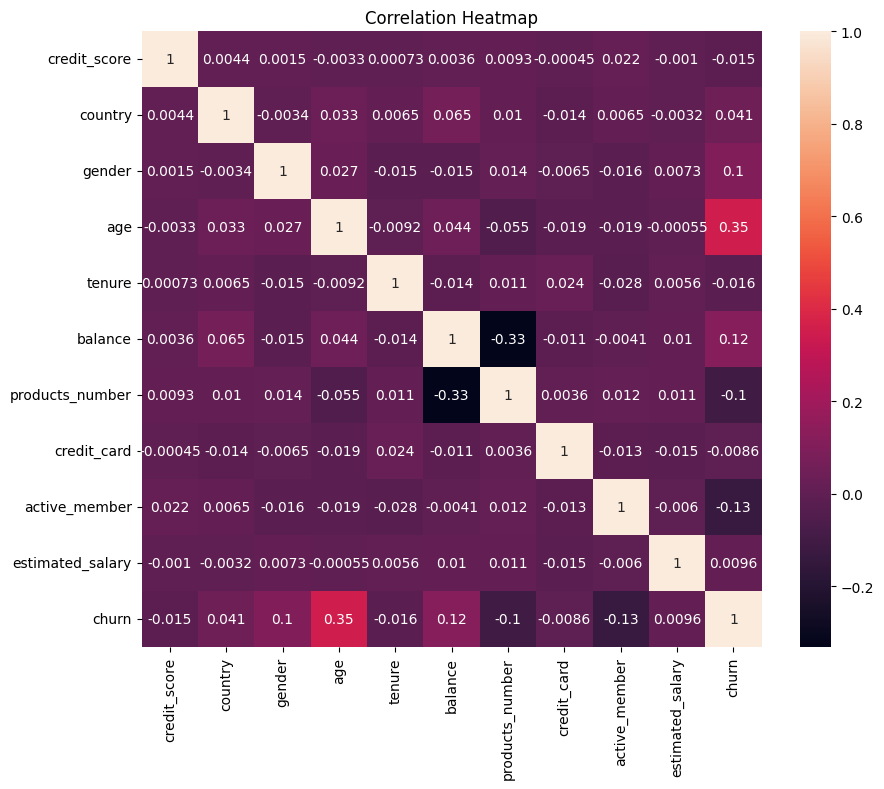

In [ ]:
numeric_df = df[['credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn']]
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

Insights
*   The Age and Churn are Positive Correlated
*   The Balance and Product Numbers are Negatively Correlated



Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
features = df.drop(columns = ['churn'], axis=1)
target = df['churn']

In [ ]:
scaler = StandardScaler()
scaler.fit(features)

StandardScaler()

In [ ]:
standarized_data = scaler.transform(features)

In [ ]:
features = standarized_data
target = df['churn']

Spliting the data into Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42)

LOGISTIC REGRESSION CLASSIFIER

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred_lr = classifier.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_lr)
print('Accuracy score : ',accuracy)

Accuracy score :  0.8229744728079911


In [ ]:
cm = confusion_matrix(y_test,y_pred_lr)
cf = classification_report(y_test,y_pred_lr)
print('\n Confusion Matrix :\n',cm)
print('\n Classification Report : \n',cf)


 Confusion Matrix :
 [[1397   48]
 [ 271   86]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1445
           1       0.64      0.24      0.35       357

    accuracy                           0.82      1802
   macro avg       0.74      0.60      0.62      1802
weighted avg       0.80      0.82      0.79      1802



K-NEAREST NEIGHBORS CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score,accuracy_score,classification_report

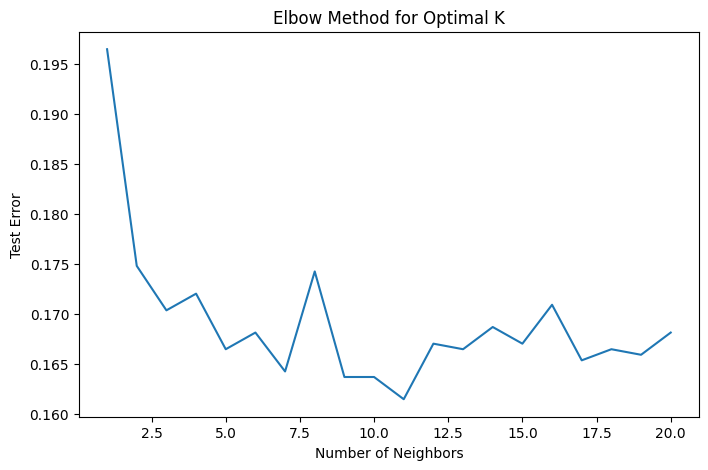

In [ ]:
test_error = []
K = range(1, 21)
for k in K:
    knn = KNN(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred_knn = knn.predict(x_test)
    error = 1 - accuracy_score(y_test, y_pred_knn)
    test_error.append(error)
plt.figure(figsize=(8, 5))
plt.plot(K, test_error)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Neighbors')
plt.ylabel('Test Error')
plt.show()

Best K Value 11

In [ ]:
best_k_index = test_error.index(min(test_error))
best_k = K[best_k_index]
best_accuracy = 1 - test_error[best_k_index]
print("Best K Value:", best_k)
print("Best Accuracy:", round(best_accuracy, 3))

Best K Value: 11
Best Accuracy: 0.839


In [ ]:
knn_final = KNN(n_neighbors=best_k)
knn_final.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
y_pred = knn_final.predict(x_test)
print("Accuracy  Score : ", accuracy_score(y_test, y_pred_knn))

Accuracy  Score :  0.8318534961154272


In [ ]:
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\n Classification Report:\n", classification_report(y_test, y_pred_knn))


 Confusion Matrix:
 [[1424   21]
 [ 282   75]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90      1445
           1       0.78      0.21      0.33       357

    accuracy                           0.83      1802
   macro avg       0.81      0.60      0.62      1802
weighted avg       0.82      0.83      0.79      1802



Support Vector Classifier

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [ ]:
y_pred_svc = svc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_svc)
print('Accuracy score : ',accuracy)

Accuracy score :  0.8473917869034406


In [ ]:
cm = confusion_matrix(y_test,y_pred_svc)
cf = classification_report(y_test,y_pred_svc)
print('\n Confusion Matrix :\n',cm)
print('\n Classification Report : \n',cf)


 Confusion Matrix :
 [[1410   35]
 [ 240  117]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1445
           1       0.77      0.33      0.46       357

    accuracy                           0.85      1802
   macro avg       0.81      0.65      0.69      1802
weighted avg       0.84      0.85      0.82      1802



Decison Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
dt  = DecisionTreeClassifier(random_state = 42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt = dt.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_dt)
print('Accuracy score : ',accuracy)

Accuracy score :  0.7902330743618202


In [ ]:
cm = confusion_matrix(y_test,y_pred_dt)
cf = classification_report(y_test,y_pred_dt)
print('\n Confusion Matrix :\n',cm)
print('\n Classification Report : \n',cf)


 Confusion Matrix :
 [[1262  183]
 [ 195  162]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      1445
           1       0.47      0.45      0.46       357

    accuracy                           0.79      1802
   macro avg       0.67      0.66      0.67      1802
weighted avg       0.79      0.79      0.79      1802



Random Forest Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)


random_search.fit(x_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)


best_rf = random_search.best_estimator_
y_pred_rf = best_rf.predict(x_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}
Best Cross-Validation Accuracy: 0.8622976965259758
Test Accuracy: 0.8551609322974473

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1445
           1       0.77      0.38      0.51       357

    accuracy                           0.86      1802
   macro avg       0.82      0.68      0.71      1802
weighted avg       0.85      0.86      0.84      1802


Confusion Matrix:
 [[1404   41]
 [ 220  137]]


XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = xgb.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_xgb)
print("Accuracy Score :",accuracy)

Accuracy Score : 0.8485016648168702


In [ ]:
results = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "SVM": accuracy_score(y_test, y_pred_svc),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "XGBoost":accuracy_score(y_test,y_pred_xgb)
}

result_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
result_df

,Model,Accuracy
0,Logistic Regression,0.822974
1,KNN,0.831853
2,SVM,0.847392
3,Decision Tree,0.790233
4,Random Forest,0.855161
5,XGBoost,0.848502


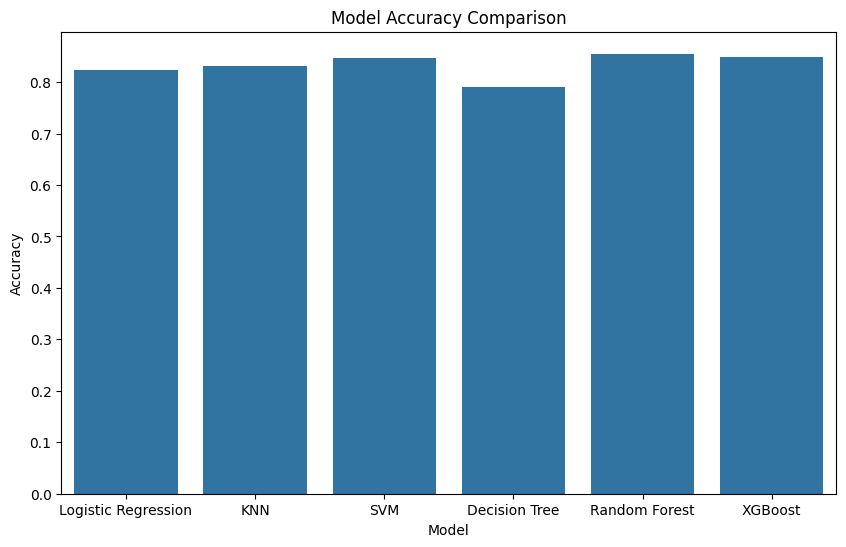

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='Accuracy', data=result_df)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


Insights
* Customers with lower Credit Score tend to have a higher likelihood of churn.
* Age influences churn: younger customers are more likely to leave than older customers.

* Customers with fewer Products or no active engagement are more likely to churn.
* Active Members are less likely to churn, showing higher loyalty.
* Balance and Estimated Salary affect churn: customers with higher balances and salaries are
less likely to leave
* Country distribution shows that some countries have higher churn rates than others.
* Gender has a minor impact, with slight differences in churn rates between male and female
customers.


In [ ]:
import joblib

joblib.dump(rf,"rf.pkl")

loaded_model = joblib.load("rf.pkl")